## Humanskin

In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import torch
from sklearn.utils import shuffle
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',  # 设置字体类型
    "font.size":22,
    "axes.unicode_minus": False #解决负号无法显示的问题
}
rcParams.update(config)

### Main text

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
from sklearn.utils import shuffle
from scipy.stats import pearsonr #,_ = pearsonr
import pandas as pd
import matplotlib.pyplot as plt
def cosine_similarity(vec1, vec2):
    """
    计算两个向量之间的余弦相似度
    :param vec1: 第一个向量
    :param vec2: 第二个向量
    :return: 余弦相似度
    """
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)
file_fold = '/data/xiangdw/data/pred result/'
total_corr_sage = []
total_mse_sage = []
for i in range(10):
    y_truth = pd.read_csv(file_fold + 'SpaMIE pred result/' + str(i + 1) + 'humanskin_SPaMIE_new_res3_wt_truth.csv',
                          header=0).to_numpy()
    y_pred = pd.read_csv(file_fold + 'SpaMIE pred result/' + str(i + 1) + 'humanskin_SpaMIE_new_res3_wt_pred.csv',
                         header=0).to_numpy()
    mse_sage = np.sqrt(np.mean(np.square(y_truth - y_pred), axis=0))
    corr_sage = []
    for col1, col2 in zip(y_pred.T, y_truth.T):
        corr,_ = pearsonr(col1, col2)
        corr_sage.append(corr)
    total_corr_sage.append(corr_sage)
    total_mse_sage.append(mse_sage)

mse_sage = np.mean(np.array(total_mse_sage), axis=0)
corr_sage = np.mean(np.array(total_corr_sage), axis=0)

## no weight
file_fold = '/data/xiangdw/data/pred result/'
total_corr_sage = []
total_mse_sage = []
for i in range(10):
    y_truth = pd.read_csv(file_fold + 'SpaMIE pred result/' + str(i + 1) + 'humanskin_SPaMIE_new_res3_truth.csv',
                          header=0).to_numpy()
    y_pred = pd.read_csv(file_fold + 'SpaMIE pred result/' + str(i + 1) + 'humanskin_SpaMIE_new_res3_pred.csv',
                         header=0).to_numpy()
    mse_nowtsage = np.sqrt(np.mean(np.square(y_truth - y_pred), axis=0))
    corr_nowtsage = []
    for col1, col2 in zip(y_pred.T, y_truth.T):
        corr,_ = pearsonr(col1, col2)
        corr_nowtsage.append(corr)
    total_corr_sage.append(corr_nowtsage)
    total_mse_sage.append(mse_nowtsage)

mse_nowtsage = np.mean(np.array(total_mse_sage), axis=0)
corr_nowtsage = np.mean(np.array(total_corr_sage), axis=0)

## no res
file_fold = '/data/xiangdw/data/pred result/'
total_corr_sage = []
total_mse_sage = []
for i in range(10):
    y_truth = pd.read_csv(file_fold + 'SpaMIE pred result/' + str(i + 1) + 'humanskin_SPaMIE_new3_wt_truth.csv',
                          header=0).to_numpy()
    y_pred = pd.read_csv(file_fold + 'SpaMIE pred result/' + str(i + 1) + 'humanskin_SpaMIE_new3_wt_pred.csv',
                         header=0).to_numpy()
    mse_noressage = np.sqrt(np.mean(np.square(y_truth - y_pred), axis=0))
    corr_noressage = []
    for col1, col2 in zip(y_pred.T, y_truth.T):
        corr,_ = pearsonr(col1, col2)
        corr_noressage.append(corr)
    total_corr_sage.append(corr_noressage)
    total_mse_sage.append(mse_noressage)

mse_noressage = np.mean(np.array(total_mse_sage), axis=0)
corr_noressage = np.mean(np.array(total_corr_sage), axis=0)

# scmogcn mse
total_corr = []
total_mse = []
for i in range(10):
    y_truth = pd.read_csv(file_fold + 'scmogcn pred result/' + str(i + 1) + 'humanskin_scmogcn_truth.csv',
                          header=0).to_numpy()
    y_pred = pd.read_csv(file_fold + 'scmogcn pred result/' + str(i + 1) + 'humanskin_scmogcn_pred.csv',
                         header=0).to_numpy()
    mse_scmogcn = np.sqrt(np.mean(np.square(y_truth - y_pred), axis=0))
    corr_scmogcn = []
    for col1, col2 in zip(y_pred.T, y_truth.T):
        corr,_ = pearsonr(col1, col2)
        corr_scmogcn.append(corr)
    total_corr.append(corr_scmogcn)
    total_mse.append(mse_scmogcn)

mse_scmogcn = np.mean(np.array(total_mse), axis=0)
corr_scmogcn = np.mean(np.array(total_corr), axis=0)

#scjoint mse
total_corr = []
total_mse = []
for i in range(10):
    y_truth = pd.read_csv(file_fold + 'scjoint pred result/' + str(i + 1) + 'humanskin_scjoint_truth.csv',
                          header=0).to_numpy()
    y_pred = pd.read_csv(file_fold + 'scjoint pred result/' + str(i + 1) + 'humanskin_scjoint_pred.csv',
                         header=0).to_numpy()
    mse_scjoint = np.sqrt(np.mean(np.square(y_truth - y_pred), axis=0))
    corr_scjoint = []
    for col1, col2 in zip(y_pred.T, y_truth.T):
        corr,_ = pearsonr(col1, col2)
        corr_scjoint.append(corr)
    total_corr.append(corr_scjoint)
    total_mse.append(mse_scjoint)

mse_scjoint = np.mean(np.array(total_mse), axis=0)
corr_scjoint = np.mean(np.array(total_corr), axis=0)

#JAMIE
total_corr = []
total_mse = []
for i in range(10):
    y_truth = pd.read_csv(file_fold + 'jamie pred result/' + str(i + 1) + 'humanskin_jamie_truth.csv',
                          header=0).to_numpy()
    y_pred = pd.read_csv(file_fold + 'jamie pred result/' + str(i + 1) + 'humanskin_jamie_pred.csv',
                         header=0).to_numpy()
    mse_jamie = np.sqrt(np.mean(np.square(y_truth - y_pred), axis=0))
    corr_jamie = []
    for col1, col2 in zip(y_pred.T, y_truth.T):
        corr,_ = pearsonr(col1, col2)
        corr_jamie.append(corr)
    total_corr.append(corr_jamie)
    total_mse.append(mse_jamie)

mse_jamie = np.mean(np.array(total_mse), axis=0)
corr_jamie = np.mean(np.array(total_corr), axis=0)

#SpaMosaic
total_corr = []
total_mse = []
for i in range(10):
    y_truth = pd.read_csv(file_fold + 'spamosaic pred result/' + str(i + 1) + 'humanskin_truth.csv',
                          header=0).to_numpy()
    y_pred = pd.read_csv(file_fold + 'spamosaic pred result/' + str(i + 1) + 'humanskin_pred.csv',
                         header=0).to_numpy()
    mse_SpaMosaic = np.sqrt(np.mean(np.square(y_truth - y_pred), axis=0))
    corr_SpaMosaic = []
    for col1, col2 in zip(y_pred.T, y_truth.T):
        corr,_ = pearsonr(col1, col2)
        corr_SpaMosaic.append(corr)
    total_corr.append(corr_SpaMosaic)
    total_mse.append(mse_SpaMosaic)

mse_SpaMosaic = np.mean(np.array(total_mse), axis=0)
corr_SpaMosaic = np.mean(np.array(total_corr), axis=0)



#MIDAS
total_corr = []
total_mse = []
for i in range(10):
    y_truth = pd.read_csv(file_fold + 'MIDAS pred result/' + str(i + 1) + '_MIDAS_Humanskin_truth.csv',
                          header=0).to_numpy()
    y_pred = pd.read_csv(file_fold + 'MIDAS pred result/' + str(i + 1) + '_MIDAS_Humanskin_pred.csv',
                         header=0).to_numpy()
    mse_MIDAS = np.sqrt(np.mean(np.square(y_truth - y_pred), axis=0))
    corr_MIDAS = []
    for col1, col2 in zip(y_pred.T, y_truth.T):
        corr,_ = pearsonr(col1, col2)
        corr_MIDAS.append(corr)
    total_corr.append(corr_MIDAS)
    total_mse.append(mse_MIDAS)

mse_MIDAS = np.mean(np.array(total_mse), axis=0)
corr_MIDAS = np.mean(np.array(total_corr), axis=0)


#StabMap
path = '/data/xiangdw/data/R_humanskin/'
total_corr = []
total_mse = []
for i in range(10):
    y_truth = pd.read_csv(file_fold + 'MIDAS pred result/' + str(i + 1) + '_MIDAS_Humanskin_truth.csv',
                          header=0).to_numpy()
    y_pred = pd.read_csv('/data/xiangdw/data/R_humanskin/R_humanskin/'+ str(i+1)+'_humanskin_stabmap_pred.csv',
                         index_col=0).T
    test_idx = pd.read_csv(path + str(i+1) + '_humanskin_test_idx.csv', header=None)
    test_idx = test_idx[0].tolist()
    y_pred.index = y_pred.index.astype(int)
    y_pred = y_pred.reindex(test_idx)
    y_pred = y_pred.to_numpy()
    mse_StabMap = np.sqrt(np.mean(np.square(y_truth - y_pred), axis=0))
    corr_StabMap = []
    for col1, col2 in zip(y_pred.T, y_truth.T):
        corr,_ = pearsonr(col1, col2)
        corr_StabMap.append(corr)
    total_corr.append(corr_StabMap)
    total_mse.append(mse_StabMap)

mse_StabMap = np.mean(np.array(total_mse), axis=0)
corr_StabMap = np.mean(np.array(total_corr), axis=0)



/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/scipy/stats/_stats_

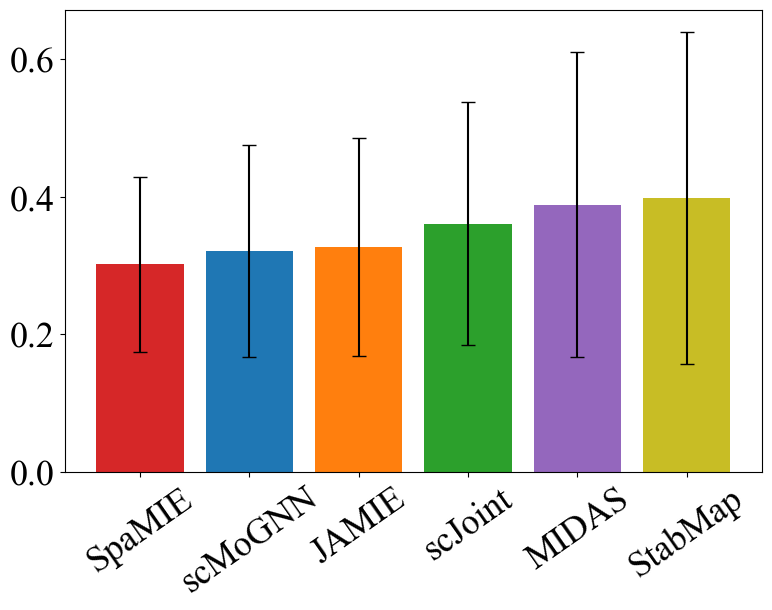

In [5]:
from brokenaxes import brokenaxes
ddd = {

    'SpaMIE': mse_sage,
    'Scmogcn': mse_scmogcn,
    'Jamie': mse_jamie,
    'Scjoint': mse_scjoint,
    'MIDAS': mse_MIDAS,
    'StabMap': mse_StabMap

}
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['font.size'] = 26

df = pd.DataFrame(ddd)

means = np.mean(df, axis=0)
std_devs = np.std(df, axis=0)
colors = ['#d62728', '#1f77b4','#ff7f0e', '#2ca02c' , '#9467bd' ,"#c8bd25"]
bin_edges = [ 'SpaMIE', 'scMoGNN','JAMIE', 'scJoint',  'MIDAS', 'StabMap']
fig, ax = plt.subplots(1, 1)
ax.bar(bin_edges, means, width=0.8, yerr=std_devs, ecolor='black', capsize=5, color=colors)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
plt.rcParams['font.size'] = 16
plt.xticks(rotation=35)
plt.show()


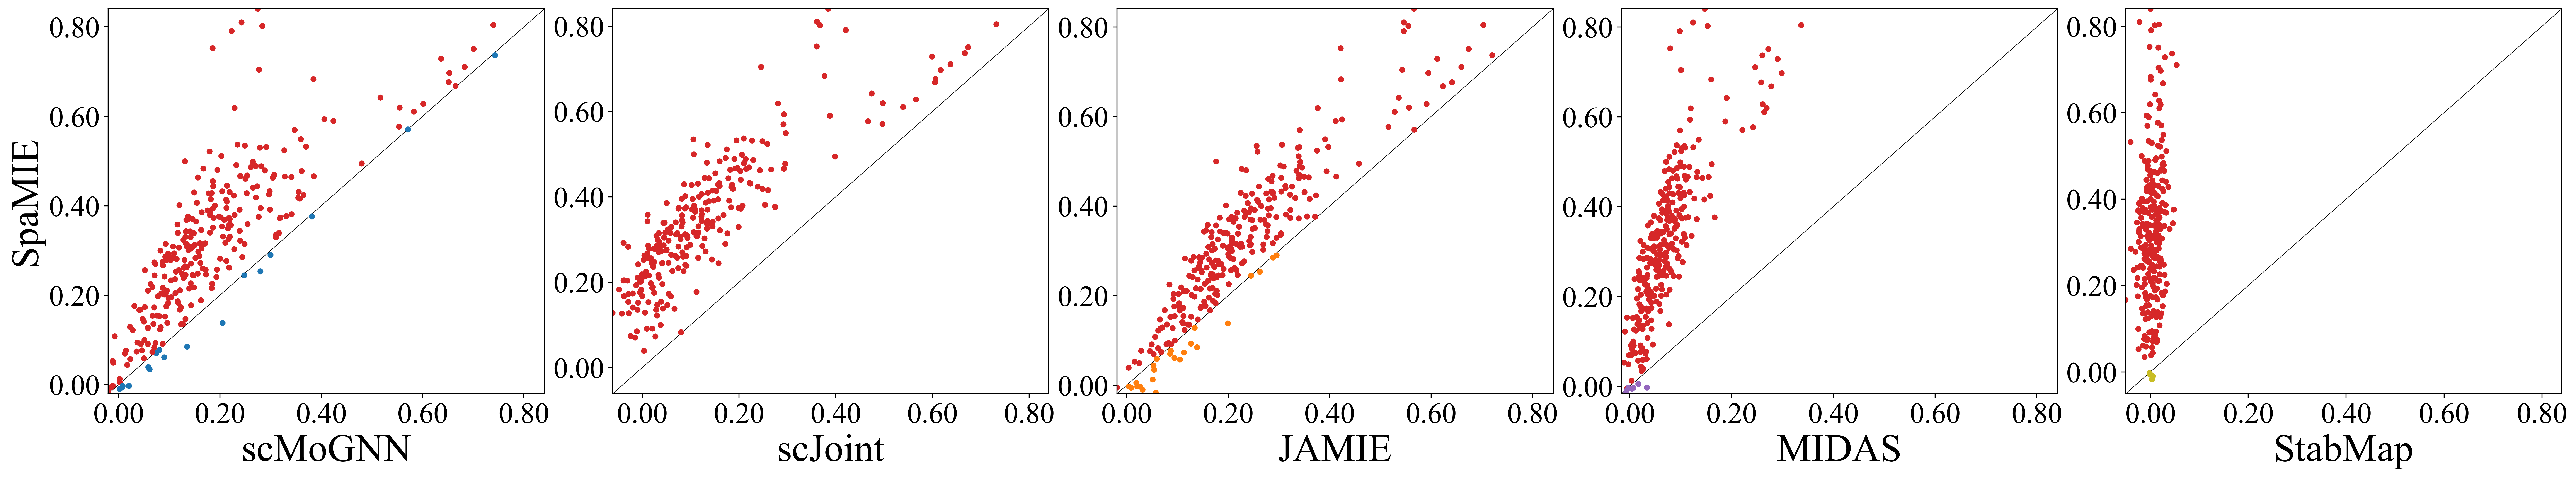

21.835236927602544 8.780234848222859e-63
42.7456433894994 2.5964844779900565e-118
22.001989957810807 2.2724814410846537e-63
31.693653266988484 4.451438303898113e-95
32.1951453054375 1.3976240018762817e-95


In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.rcParams['figure.figsize'] = (30, 6)
plt.rcParams['font.size'] = 24
fig, ax = plt.subplots(1, 5,dpi=400)

def get_colors(x_data, y_data, color='#1f77b4'):

    colors = []
    for x, y in zip(x_data, y_data):
        if y > x:  # 45度线下方（红）
            colors.append('#d62728')
        else:       # 45度线上方（蓝）
            colors.append(color)
    return colors

def setup_axis(ax, x_data, y_data, label, color):

    colors = get_colors(x_data, y_data, color=color)
    ax.scatter(x_data, y_data, color=colors, s=15)

    all_values = np.concatenate([x_data, y_data])
    axis_min = np.nanmin(all_values)*0.9999
    axis_max = np.nanmax(all_values)*1.0001
    
    ax.axline((0.4, 0.4), slope=1, color='k', linewidth=0.5, zorder=0)

    ax.set_xlim(axis_min, axis_max)
    ax.set_ylim(axis_min, axis_max)
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))

    ax.set_xlabel(label, fontsize=32)


setup_axis(ax[0], corr_scmogcn, corr_sage, 'scMoGNN',color='#1f77b4')
setup_axis(ax[1], corr_scjoint, corr_sage, 'scJoint',color='#2ca02c')
setup_axis(ax[2], corr_jamie, corr_sage, 'JAMIE',color='#ff7f0e')
setup_axis(ax[3], corr_MIDAS, corr_sage, 'MIDAS',color='#9467bd')
setup_axis(ax[4], corr_StabMap, corr_sage, 'StabMap',color='#c8bd25')

ax[0].set_ylabel('SpaMIE', fontsize=32)

plt.tight_layout(w_pad=0.3)
plt.show()

comparisons = [

    (corr_scmogcn, corr_sage, ax[0]),  
    (corr_scjoint, corr_sage, ax[1]),
    (corr_jamie, corr_sage, ax[2]),  
    (corr_MIDAS, corr_sage, ax[3]), 
    (corr_StabMap, corr_sage, ax[4])
]    
from scipy.stats import ttest_rel 
for data1, data2, ax_obj in comparisons:

    t_stat, p_value = ttest_rel(data2,data1, nan_policy='omit',alternative='greater')  # 若独立样本改用 ttest_ind
    
    p_text =("%.3g" %p_value)

    ax_obj.text(
        x=0.65, y=0.15, 
        s=p_text,
        transform=ax_obj.transAxes,  
        fontsize=24,
        verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')  # 添加白色背景
    )
    print(t_stat, p_value)



In [8]:
adata_ADT = sc.read_h5ad('/data/xiangdw/data/data/adata_ADT_humanskin.h5ad')
ADT_names = list(adata_ADT.var_names)
corr_jamie = {'JAMIE': list(corr_jamie)}
corr_SpaMosaic = {'SpaMosaic': list(corr_SpaMosaic)}
corr_scmogcn = {'scMoGNN': list(corr_scmogcn)}
corr_scjoint = {'scJoint': list(corr_scjoint)}
corr_sage = {'SpaMIE': list(corr_sage)}
corr_MIDAS = {'MIDAS': list(corr_MIDAS)}
corr_StabMap = {'StabMap': list(corr_StabMap)}
d = {}
d = { **corr_sage , **corr_scmogcn,**corr_scjoint, **corr_jamie, **corr_MIDAS, **corr_StabMap} 

d =pd.DataFrame(d)


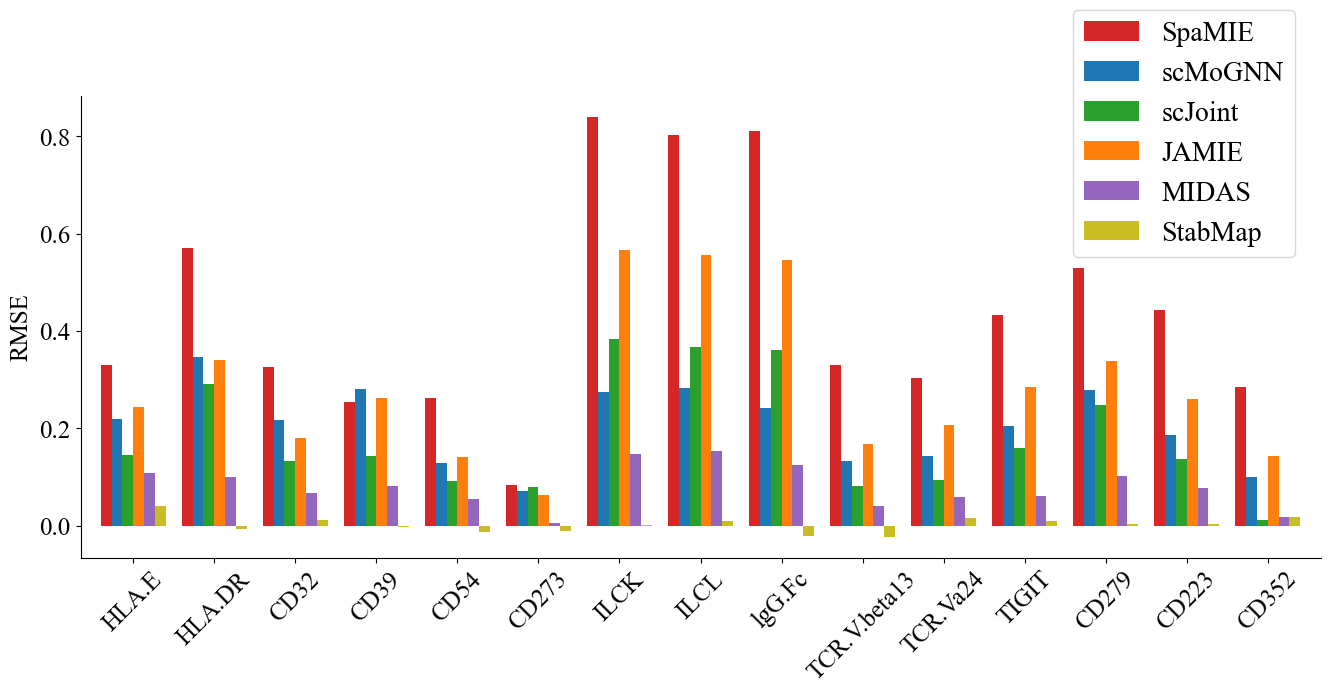

In [9]:
a = d.iloc[[33, 281, 99, 58, 109, 26, 137, 138, 132, 107, 47, 60, 95, 13, 257]]
a.index = ['HLA.E','HLA.DR','CD32','CD39','CD54','CD273','ILCK',
                     'ILCL','lgG.Fc','TCR.V.beta13','TCR.Va24','TIGIT','CD279','CD223','CD352']#'HLA.E','HLA.DR.DP.DQ','CD32','CD39','CD54','CD273','Ig.light.chain.kappa',
                     #'Ig.light.chain.lambda','lgG.Fc','TCR.V.beta13','TCR.Va24','TIGIT','CD279','CD223','CD352'
res_stack = a.T.stack().reset_index()
res_stack
res_stack.columns=['Method', 'ADT_name', 'value']
res_stack.set_index('Method')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,6)
plt.rcParams['font.size'] = 18
plt.rcParams['font.sans-serif'] = 'Arial'

# ax = sns.boxplot(data=res_stack, x='Method', y='value', linewidth=0.5, showfliers=False)
colors =  ['#d62728', '#1f77b4','#2ca02c' ,'#ff7f0e',  '#9467bd' ,"#c8bd25"]
ax = a.plot(kind='bar', width=0.8, color=colors)
plt.legend(bbox_to_anchor=(0.80, 0.65), loc=3, borderaxespad=0, fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('RMSE')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

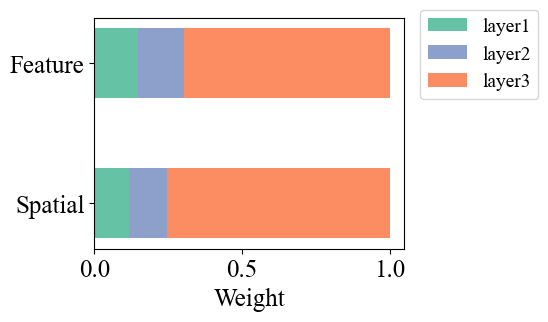

In [10]:
import matplotlib.pyplot as plt
import numpy as np
Wt = pd.read_csv('/data/xiangdw/data/pred result/humanskin_wt.csv')
Wt = np.array(Wt)
fig, axes = plt.subplots(1, 1, figsize=(4,3))
bar_width = 0.5 

x_positions = np.arange(len(Wt)) + 1  
x_values = [bar_width] * len(Wt)


plt.barh(x_positions - bar_width/2, Wt[:, 0], x_values, tick_label=[ 'Spatial','Feature',],
         align='center', color='#66c2a5', label='layer1')
plt.barh(x_positions - bar_width/2, Wt[:, 1], x_values, left=Wt[:, 0], align='center', color='#8da0cb', label='layer2')
plt.barh(x_positions - bar_width/2, Wt[:, 2], x_values, left=Wt[:, 0] + Wt[:, 1], align='center', color='#fc8d62', label='layer3')
plt.legend(bbox_to_anchor=(1.05, 0.65), loc=3, borderaxespad=0, fontsize=14)
plt.rcParams['font.size'] = 20
plt.xlabel('Weight')
plt.show()

/tmp/ipykernel_2916024/734798379.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(alph1['Spatial'], shade=True, color=c2, ax=ax)
/tmp/ipykernel_2916024/734798379.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(alph1['Feature'], shade=True, color=c3, ax=ax)


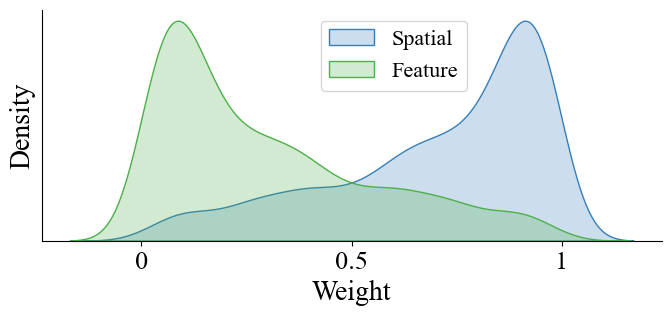

In [11]:

alph1 = pd.read_csv('/data/xiangdw/data/pred result/humanskin_alph.csv')
y2 = 0
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8,3))
plt.rcParams['font.size'] = 20

c1, c2, c3 = sns.color_palette('Set1', 3)
sns.kdeplot(alph1['Spatial'], shade=True, color=c2, ax=ax)
sns.kdeplot(alph1['Feature'], shade=True, color=c3, ax=ax)

plt.xticks([0, 0.5, 1], ['0', '0.5', '1'], fontsize=19)   

plt.yticks([])
plt.xlabel('Weight')
sns.despine();#在画完图之后插入这一句
plt.legend(bbox_to_anchor=(0.45, 0.65), loc=3, borderaxespad=0,  fontsize=16 ,labels=['Spatial', 'Feature'])
plt.show()